In [175]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [176]:
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score

In [177]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
sub = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")

In [178]:
sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [179]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [182]:
# 60000 set of images
x_train.shape

(60000, 28, 28)

In [183]:
# 10000 set of images
x_test.shape

(10000, 28, 28)

In [184]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [185]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

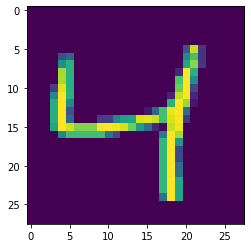

In [186]:
plt.imshow(x_train[2])

In [187]:
x_train = x_train/255
x_test = x_test/255

In [188]:
x_train[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [189]:
model = Sequential()

# To flatten the layer as the it is store as 28x28 and we need it in coninues sequence of 784

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [190]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_20 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [191]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam",metrics=["accuracy"])

In [192]:
history = model.fit(x_train,y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2725 - accuracy: 0.9204 - val_loss: 0.1381 - val_accuracy: 0.9587
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1133 - accuracy: 0.9659 - val_loss: 0.1160 - val_accuracy: 0.9674
Epoch 3/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0787 - accuracy: 0.9759 - val_loss: 0.0986 - val_accuracy: 0.9707
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0596 - accuracy: 0.9813 - val_loss: 0.0906 - val_accuracy: 0.9739
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0458 - accuracy: 0.9860 - val_loss: 0.1050 - val_accuracy: 0.9709
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0368 - accuracy: 0.9882 - val_loss: 0.0979 - val_accuracy: 0.9738
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0280 - accuracy: 0.9910 - val_loss: 0.1121 - val_accuracy:

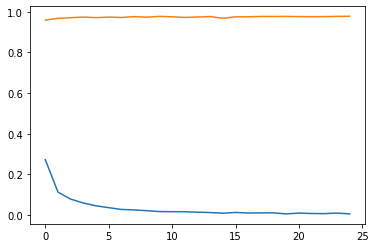

In [193]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_accuracy"])

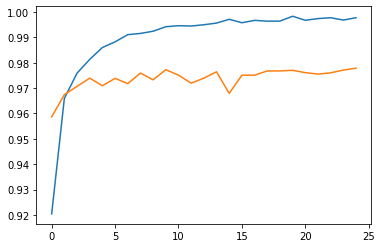

In [194]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [195]:
pred = model.predict(x_test)
pred = pred.argmax(axis=1)

In [196]:
accuracy_score(y_test,pred)*100

98.00999999999999

In [197]:
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [198]:
test_pred = model.predict(test)
test_pred = test_pred.argmax(axis=1)
test_pred

array([2, 0, 9, ..., 3, 9, 2])

In [200]:
ImageId = pd.Series(range(1,28001))
submission = pd.DataFrame({"ImageId": ImageId,"Label": test_pred})
submission.to_csv("mnist_digit_recognizer.csv", index=False)